In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [4]:
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print(white.shape)
white.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red['type']=0
white['type']=1
wine=pd.concat([red,white])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [7]:
import matplotlib.pyplot as plt

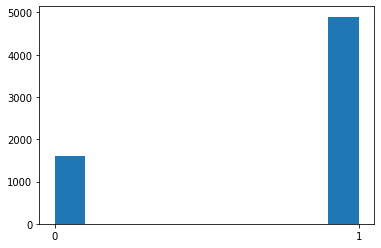

1    4898
0    1599
Name: type, dtype: int64


In [8]:
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()
print(wine['type'].value_counts())

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [10]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [11]:
wine_norm=(wine-wine.min())/(wine.max()-wine.min())

In [12]:
wine_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0


In [13]:
wine_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.469730,0.753886
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.145543,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,0.333333,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])
wine_shuffle.head()

[[0.18181818 0.02       0.28313253 0.15337423 0.07142857 0.23611111
  0.32718894 0.16753422 0.14728682 0.06741573 0.1884058  0.16666667
  1.        ]
 [0.16528926 0.04666667 0.29518072 0.00766871 0.06478405 0.06944444
  0.21198157 0.11162522 0.36434109 0.14606742 0.17391304 0.33333333
  1.        ]
 [0.70247934 0.12666667 0.29518072 0.03834356 0.11627907 0.09375
  0.0921659  0.2350106  0.37209302 0.3258427  0.31884058 0.5
  0.        ]
 [0.19834711 0.09333333 0.1686747  0.02453988 0.05149502 0.07986111
  0.27419355 0.08849046 0.36434109 0.14606742 0.36231884 0.5
  1.        ]
 [0.4214876  0.13333333 0.27108434 0.01687117 0.09634551 0.02083333
  0.01382488 0.12396376 0.41085271 0.18539326 0.62318841 0.66666667
  0.        ]]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2818,0.181818,0.020000,0.283133,0.153374,0.071429,0.236111,0.327189,0.167534,0.147287,0.067416,0.188406,0.166667,1.0
1656,0.165289,0.046667,0.295181,0.007669,0.064784,0.069444,0.211982,0.111625,0.364341,0.146067,0.173913,0.333333,1.0
575,0.702479,0.126667,0.295181,0.038344,0.116279,0.093750,0.092166,0.235011,0.372093,0.325843,0.318841,0.500000,0.0
4417,0.198347,0.093333,0.168675,0.024540,0.051495,0.079861,0.274194,0.088490,0.364341,0.146067,0.362319,0.500000,1.0
1010,0.421488,0.133333,0.271084,0.016871,0.096346,0.020833,0.013825,0.123964,0.410853,0.185393,0.623188,0.666667,0.0


In [15]:
train_idx=int(len(wine_np)*0.8)
train_idx

5197

In [16]:
train_X=wine_np[:train_idx,:12]
train_y=wine_np[:train_idx,-1]
test_X=wine_np[train_idx:,:12]
test_y=wine_np[train_idx:,-1]

In [17]:
train_Y=tf.keras.utils.to_categorical(train_y,num_classes=2)
test_Y=tf.keras.utils.to_categorical(test_y,num_classes=2)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48,activation='relu',input_shape=(12,)),
    tf.keras.layers.Dense(units=24,activation='relu'),
    tf.keras.layers.Dense(units=12,activation='relu'),
    tf.keras.layers.Dense(units=2,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [19]:
train_X[0]

array([0.18181818, 0.02      , 0.28313253, 0.15337423, 0.07142857,
       0.23611111, 0.32718894, 0.16753422, 0.14728682, 0.06741573,
       0.1884058 , 0.16666667])

In [20]:
train_X.shape

(5197, 12)

In [21]:
train_Y.shape

(5197, 2)

In [22]:
train_X[0].shape

(12,)

In [23]:
train_X[0].reshape(1,-1)

array([[0.18181818, 0.02      , 0.28313253, 0.15337423, 0.07142857,
        0.23611111, 0.32718894, 0.16753422, 0.14728682, 0.06741573,
        0.1884058 , 0.16666667]])

In [24]:
model.predict(train_X[0].reshape(1,-1))

array([[0.44775298, 0.5522469 ]], dtype=float32)

In [25]:
model.predict(train_X[1].reshape(1,-1))

array([[0.4444708, 0.5555292]], dtype=float32)

In [26]:
train_Y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [27]:
train_y

array([1., 1., 0., ..., 1., 1., 1.])

In [28]:
history = model.fit(train_X,train_y,epochs=25,batch_size=32,validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 170us/sample - loss: 0.1514 - accuracy: 0.9415 - val_loss: 0.0619 - val_accuracy: 0.9823
Epoch 2/25
3897/3897 [==============================] - 0s 35us/sample - loss: 0.0579 - accuracy: 0.9826 - val_loss: 0.0536 - val_accuracy: 0.9854
Epoch 3/25
3897/3897 [==============================] - 0s 37us/sample - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.0507 - val_accuracy: 0.9892
Epoch 4/25
3897/3897 [==============================] - 0s 37us/sample - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0914 - val_accuracy: 0.9746
Epoch 5/25
3897/3897 [==============================] - 0s 36us/sample - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0683 - val_accuracy: 0.9838
Epoch 6/25
3897/3897 [==============================] - 0s 36us/sample - loss: 0.0464 - accuracy: 0.9851 - val_loss: 0.0508 - val_accuracy: 0.9892
Epoch 7/25
3897/3897 [==============================] - 0s 38us/sampl

In [29]:
result=model.evaluate(test_X,test_y)

1300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

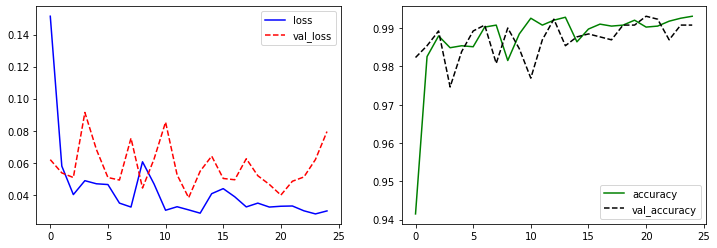

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.legend()

In [55]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

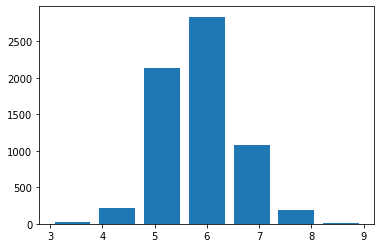

In [66]:
plt.hist(wine['quality'],bins=7,rwidth=0.8)
plt.show()

In [67]:
wine_copy=wine.copy()

In [74]:
wine_copy.loc[wine_copy['quality']<6,'new_quality']=0
wine_copy.loc[wine_copy['quality']==6,'new_quality']=1
wine_copy.loc[wine_copy['quality']>6,'new_quality']=2

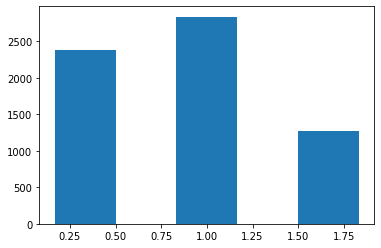

In [79]:
plt.hist(wine_copy['new_quality'],bins=3,rwidth=0.5)
plt.show()

In [80]:
wine_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.0


In [81]:
del wine_copy['quality']

In [82]:
wine_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.0


In [102]:
wine_norm['new_quality']=wine_copy['new_quality']

In [103]:
wine_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000,1.0,1.0
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333,1.0,0.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000,1.0,1.0
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667,1.0,2.0


In [104]:
df=wine_norm.copy()

In [106]:
del df['quality']

In [108]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.753886,0.829614
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.430779,0.731124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,1.000000,0.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,1.000000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [151]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.0,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.0,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.0,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,1.0,1.0
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,1.0,0.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,1.0,1.0
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,1.0,2.0


In [160]:
df_shuffle=df.sample(frac=1)

In [179]:
train_X=df_shuffle.iloc[:train_idx,:-1]
train_y=df_shuffle.iloc[:train_idx,-1]
test_X=df_shuffle.iloc[train_idx:,:-1]
test_y=df_shuffle.iloc[train_idx:,-1]

In [121]:
train_X=train_X.to_numpy()
train_y=train_y.to_numpy()
test_X=test_X.to_numpy()
test_y=test_y.to_numpy()

In [163]:
df_shuffle

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
823,0.239669,0.073333,0.138554,0.085890,0.063123,0.121528,0.255760,0.142472,0.480620,0.117978,0.231884,1.0,1.0
3330,0.239669,0.100000,0.198795,0.115031,0.064784,0.152778,0.391705,0.146713,0.302326,0.168539,0.304348,1.0,1.0
1768,0.231405,0.193333,0.042169,0.012270,0.064784,0.197917,0.317972,0.098130,0.348837,0.089888,0.289855,1.0,0.0
4889,0.090909,0.103333,0.162651,0.171012,0.034884,0.114583,0.258065,0.159823,0.271318,0.157303,0.202899,1.0,1.0
2887,0.214876,0.080000,0.168675,0.029141,0.038206,0.079861,0.179724,0.088105,0.457364,0.185393,0.507246,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.380165,0.320000,0.048193,0.023006,0.159468,0.052083,0.087558,0.167534,0.317829,0.168539,0.434783,0.0,0.0
415,0.396694,0.430000,0.144578,0.092025,0.179402,0.104167,0.294931,0.275496,0.465116,0.477528,0.188406,0.0,0.0
2706,0.305785,0.133333,0.234940,0.147239,0.059801,0.201389,0.467742,0.194525,0.341085,0.230337,0.231884,1.0,1.0
3995,0.347107,0.193333,0.186747,0.062883,0.048173,0.006944,0.278802,0.091575,0.139535,0.280899,0.594203,1.0,0.0


In [180]:
train_X=train_X.to_numpy()
test_X=test_X.to_numpy()

In [181]:
train_y=tf.keras.utils.to_categorical(train_y,num_classes=3)

In [182]:
test_y=tf.keras.utils.to_categorical(test_y,num_classes=3)

In [167]:
train_y[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [172]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48,activation='relu',input_shape=(12,)),
    tf.keras.layers.Dense(units=24,activation='relu'),
    tf.keras.layers.Dense(units=12,activation='relu'),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.03),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_33 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_34 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 39        
Total params: 2,139
Trainable params: 2,139
Non-trainable params: 0
_________________________________________________________________


In [173]:
history = model.fit(train_X,train_y,epochs=25,batch_size=32,validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 0s 118us/sample - loss: 0.9541 - accuracy: 0.4994 - val_loss: 0.9224 - val_accuracy: 0.4892
Epoch 2/25
3897/3897 [==============================] - 0s 37us/sample - loss: 0.9018 - accuracy: 0.5491 - val_loss: 0.8784 - val_accuracy: 0.5569
Epoch 3/25
3897/3897 [==============================] - 0s 34us/sample - loss: 0.8845 - accuracy: 0.5568 - val_loss: 0.8692 - val_accuracy: 0.5585
Epoch 4/25
3897/3897 [==============================] - 0s 39us/sample - loss: 0.8755 - accuracy: 0.5594 - val_loss: 0.9077 - val_accuracy: 0.5054
Epoch 5/25
3897/3897 [==============================] - 0s 38us/sample - loss: 0.8754 - accuracy: 0.5627 - val_loss: 0.8587 - val_accuracy: 0.5731
Epoch 6/25
3897/3897 [==============================] - 0s 37us/sample - loss: 0.8665 - accuracy: 0.5738 - val_loss: 0.8539 - val_accuracy: 0.5808
Epoch 7/25
3897/3897 [==============================] - 0s 37us/sampl

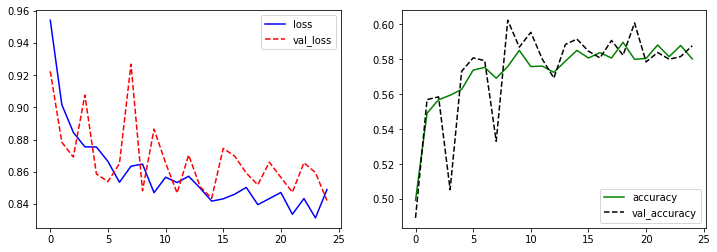

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.legend()

In [183]:
test_X

array([[0.2892562 , 0.14666667, 0.44578313, ..., 0.1011236 , 0.10144928,
        1.        ],
       [0.10743802, 0.14      , 0.1686747 , ..., 0.08426966, 0.43478261,
        1.        ],
       [0.2231405 , 0.1       , 0.21686747, ..., 0.10674157, 0.11594203,
        1.        ],
       ...,
       [0.30578512, 0.13333333, 0.23493976, ..., 0.23033708, 0.23188406,
        1.        ],
       [0.34710744, 0.19333333, 0.18674699, ..., 0.28089888, 0.5942029 ,
        1.        ],
       [0.25619835, 0.09333333, 0.22289157, ..., 0.33707865, 0.2173913 ,
        1.        ]])

In [184]:
test_y

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [185]:
model.evaluate(test_X,test_y)

1300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8574435107524578, 0.58]

In [186]:
fasion_mnist = tf.keras.datasets.fashion_mnist

In [195]:
(train_X,train_y),(test_X,test_y)=fasion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [197]:
train_X.shape

(60000, 28, 28)

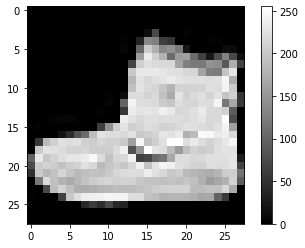

9


In [202]:
plt.imshow(train_X[0],cmap='gray')
plt.colorbar()
plt.show()
print(train_y[0])

In [205]:
train_X=train_X/255.0
test_X=test_X/255.0

In [230]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [215]:
train_X[0].shape

(28, 28)

In [226]:
train_X[0].reshape(1,28,28).shape

(1, 28, 28)

In [227]:
model.predict(train_X[0].reshape(1,28,28))

array([[0.16304526, 0.01730163, 0.0669037 , 0.15068315, 0.07656967,
        0.06663705, 0.240476  , 0.0561425 , 0.1051276 , 0.0571134 ]],
      dtype=float32)

In [232]:
history=model.fit(train_X,train_y,epochs=25,validation_split=0.25,
                 callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_accuracy')])

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 2s 44us/sample - loss: 0.3172 - accuracy: 0.8848 - val_loss: 0.3357 - val_accuracy: 0.8774
Epoch 2/25
45000/45000 [==============================] - 2s 42us/sample - loss: 0.2997 - accuracy: 0.8897 - val_loss: 0.3354 - val_accuracy: 0.8811
Epoch 3/25
45000/45000 [==============================] - 2s 43us/sample - loss: 0.2836 - accuracy: 0.8956 - val_loss: 0.3445 - val_accuracy: 0.8747
Epoch 4/25
45000/45000 [==============================] - 2s 44us/sample - loss: 0.2716 - accuracy: 0.8998 - val_loss: 0.3329 - val_accuracy: 0.8790
Epoch 5/25
45000/45000 [==============================] - 2s 42us/sample - loss: 0.2596 - accuracy: 0.9042 - val_loss: 0.3283 - val_accuracy: 0.8824
Epoch 6/25
45000/45000 [==============================] - 2s 42us/sample - loss: 0.2497 - accuracy: 0.9065 - val_loss: 0.3183 - val_accuracy: 0.8877
Epoch 7/25
45000/45000 [==============================] 

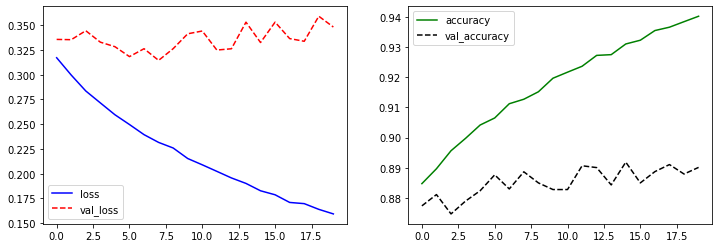

In [233]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.legend()

In [234]:
model.evaluate(test_X,test_y)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.38550487756729124, 0.8842]